In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import pylab
import seaborn as sns

In [5]:
%load_ext autoreload
%autoreload 2

## Testing price response functions

In [6]:
tsla_df = pd.read_csv('../data/market_orders/TSLA-2016-R1.csv', header=0,index_col=0)
ebay_df = pd.read_csv('../data/market_orders/EBAY-2016-R1.csv', header=0,index_col=0)

In [7]:
from liquidity.response_functions.price_response_functions import compute_conditional_aggregate_impact
from liquidity.response_functions.price_response_functions import compute_price_response

In [8]:

SAMPLE_LAG = 100
ACF_RANGE = 1001
tsla_100 = compute_conditional_aggregate_impact(tsla_df, T=SAMPLE_LAG)
ebay_100 = compute_conditional_aggregate_impact(ebay_df, T=SAMPLE_LAG)

In [9]:
tsla_100.describe()

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R100
count,7576,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7.576000e+03,7576.000000,7576.000000
mean,2016-06-23 00:30:08.185890304,208.625695,2.224214,-2.342526,-0.040655,0.024219,3.615686e+05,3590.626980,-0.001173
min,2016-01-04 10:30:02.487834868,144.830000,-204.946257,-259.645719,-1.000000,-0.109997,8.077400e+04,962.000000,-19.100000
25%,2016-03-23 14:46:03.794099712,193.805000,-12.008908,-22.668697,-1.000000,0.018343,2.383570e+05,2475.000000,-0.365000
50%,2016-06-14 14:11:20.921004032,207.175000,1.370815,-1.495887,-1.000000,0.023188,3.092610e+05,3171.000000,0.000000
75%,2016-09-30 11:03:42.460367872,223.727500,16.252593,18.282880,1.000000,0.028822,4.393330e+05,4370.000000,0.350000
max,2016-12-30 14:46:27.540027150,267.315000,431.529295,201.552866,1.000000,0.140840,1.134392e+06,9210.000000,12.135000
std,NaN,23.926687,30.615437,35.970179,0.999239,0.020078,1.799494e+05,1582.391274,0.931059


In [10]:
tsla_df_lo = pd.read_csv('../data/limit_orders/TSLA-2016-R1-LO.csv', header=0,index_col=0)

In [11]:
tsla_100_lo = compute_conditional_aggregate_impact(tsla_df_lo, T=SAMPLE_LAG)

In [12]:
tsla_100_lo.describe()

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R100
count,3468,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3.468000e+03,3468.000000,3468.000000
mean,2016-02-24 19:08:47.828224,211.492950,7.186942,7.911859,-0.044983,-0.010559,2.430010e+06,24666.205017,-0.008179
min,2016-01-04 10:30:02.487909338,194.235000,-768.851448,-481.594773,-1.000000,-0.016702,6.079310e+05,6233.000000,-16.725000
25%,2016-01-04 13:17:44.965637888,200.655000,-26.877748,-28.215222,-1.000000,-0.012363,2.349995e+06,21165.000000,-0.065000
50%,2016-01-12 14:25:19.728181248,207.600000,-1.981517,0.000000,-1.000000,-0.010221,2.356132e+06,24226.000000,0.000000
75%,2016-06-22 13:06:58.176105216,221.760000,37.179111,36.654148,1.000000,-0.008865,2.406590e+06,25091.000000,0.065000
max,2016-08-23 10:52:55.753630266,225.565000,784.039675,756.511896,1.000000,-0.004414,3.158604e+06,33340.000000,4.185000
std,NaN,10.141601,109.604320,97.650769,0.999132,0.002169,4.801195e+05,5531.123074,0.400838


In [13]:
# MO_LAG_INTERVALS = (5, 10, 20, 50, 100)
MO_LAG_INTERVALS = np.arange(5, 100, 5)

# Test response functions

In [14]:
tsla_df.head()

,event_timestamp,trade_sign,side,lob_action,order_executed,execution_price,execution_size,ask,bid,midprice,ask_volume,bid_volume,price_changing,midprice_change,R1,norm_trade_volume
0,2016-01-04 10:30:02.487834868,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
1,2016-01-04 10:30:02.594369706,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
2,2016-01-04 10:30:02.602151380,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,200.0,100.0,True,-0.095,0.095,0.708122
3,2016-01-04 10:30:02.627167275,-1,BID,REMOVE,True,221.27,25,221.36,221.27,221.315,200.0,25.0,True,-0.010,0.010,0.177031
4,2016-01-04 10:30:02.895123534,-1,BID,REMOVE,True,221.25,100,221.36,221.25,221.305,100.0,100.0,True,-0.090,0.090,0.708122


In [15]:
R1 = compute_price_response(tsla_df)
R1.head()

,midprice,sign,daily_R1,R1
0,221.410,-1,0.027301,0.000
1,221.410,-1,0.027301,0.000
2,221.410,-1,0.027301,-0.095
3,221.315,-1,0.027301,-0.010
4,221.305,-1,0.027301,-0.090


In [16]:
R1 = compute_price_response(tsla_df, lag=4)
R1.head()

,midprice,sign,daily_R1,R4
0,221.410,-1,0.027301,-0.105
1,221.305,-1,0.027301,-0.105
2,221.200,1,0.027301,0.005
3,221.205,1,0.027301,0.020
4,221.225,1,0.027301,0.000


In [17]:
R1 = compute_price_response(tsla_df, lag=4, normalise=True)
R1.head()

,midprice,sign,daily_R1,R4
0,221.410,-1,0.027301,-0.093019
1,221.305,-1,0.027301,-0.093019
2,221.200,1,0.027301,0.004429
3,221.205,1,0.027301,0.017718
4,221.225,1,0.027301,0.000000


#  Fitting process

In [18]:
tsla_df.head()

,event_timestamp,trade_sign,side,lob_action,order_executed,execution_price,execution_size,ask,bid,midprice,ask_volume,bid_volume,price_changing,midprice_change,R1,norm_trade_volume
0,2016-01-04 10:30:02.487834868,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
1,2016-01-04 10:30:02.594369706,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
2,2016-01-04 10:30:02.602151380,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,200.0,100.0,True,-0.095,0.095,0.708122
3,2016-01-04 10:30:02.627167275,-1,BID,REMOVE,True,221.27,25,221.36,221.27,221.315,200.0,25.0,True,-0.010,0.010,0.177031
4,2016-01-04 10:30:02.895123534,-1,BID,REMOVE,True,221.25,100,221.36,221.25,221.305,100.0,100.0,True,-0.090,0.090,0.708122


In [19]:
"""
Approach I: fit scaling form on all data to find exponents and then use them for renormalisation


Approach II: produce series of RN and QN by fitting scaling funtion for different N, then use powerlaw library to fit power law and determine scale factors; finally, fit known scaling form to find exponents and then use them for renormalisation

"""

'\nApproach I: fit scaling form on all data to find exponents and then use them for renormalisation\n\n\nApproach II: produce series of RN and QN by fitting scaling funtion for different N, then use powerlaw library to fit power law and determine scale factors; finally, fit known scaling form to find exponents and then use them for renormalisation\n\n'

## Approach I

In [20]:
from liquidity.response_functions.fitting import compute_scaling_exponents, renormalise

In [21]:
MO_LAG_INTERVALS = (5, 10, 20, 50, 100, 150, 200)
# MO_LAG_INTERVALS = np.arange(5, 100, 5)

In [22]:
popt_tsla, pcov_tsla, fit_func, data_norm = compute_scaling_exponents(tsla_df, MO_LAG_INTERVALS)

In [23]:
popt_tsla

array([3.22877450e-01, 2.11407604e-03, 3.41326854e-01, 1.68397197e+01,
       2.34134643e+05])

In [24]:
renor_results = renormalise(data_norm, popt_tsla, MO_LAG_INTERVALS)

/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/response_functions/fitting.py:20: RuntimeWarning: overflow encountered in power
  return x / (1 + abs(x) ** alpha) ** (beta / alpha)


Optimal parameters not found: The maximum number of function evaluations is exceeded
re-trying
Optimal parameters not found: The maximum number of function evaluations is exceeded
Failed to fit for lag 5
Optimal parameters not found: The maximum number of function evaluations is exceeded
re-trying
Optimal parameters not found: The maximum number of function evaluations is exceeded
Failed to fit for lag 200


In [25]:
renor_results

{10: <liquidity.response_functions.fitting.FitResult at 0x7f9460444a60>,
 20: <liquidity.response_functions.fitting.FitResult at 0x7f94a26c7e50>,
 50: <liquidity.response_functions.fitting.FitResult at 0x7f945b4e87f0>,
 100: <liquidity.response_functions.fitting.FitResult at 0x7f945b4e80a0>,
 150: <liquidity.response_functions.fitting.FitResult at 0x7f945e442d30>}

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

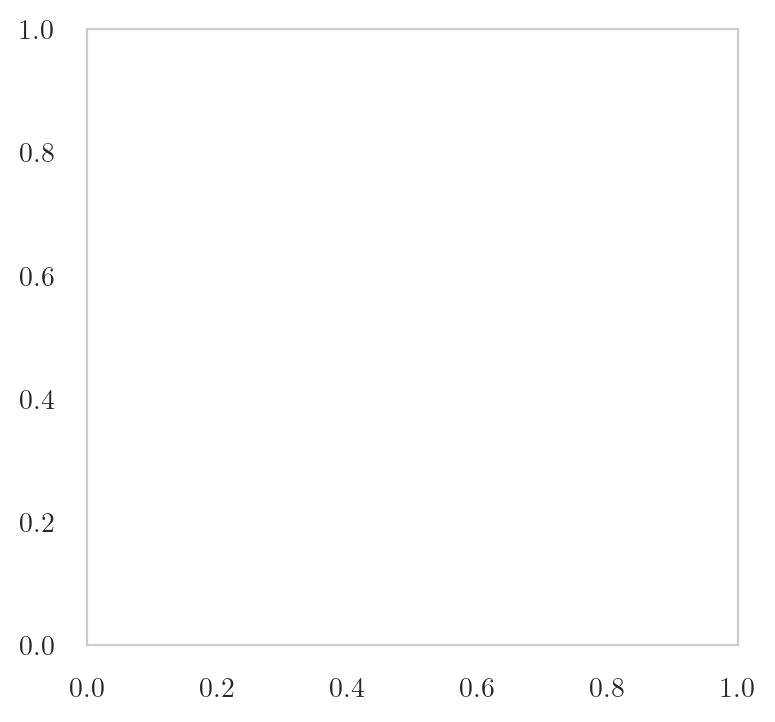

In [26]:
from liquidity.util.plotting.plot_aggrate_impact import plot_collapsed_fitted_func

fit_param = {T: fit_result.params for T, fit_result in renor_results.items()}
plot_collapsed_fitted_func(fit_param, line_color="#624B00", markers_color="#FCC400",
                           xlim=0.0001, ylim=3,
                           durations=MO_LAG_INTERVALS)

## Assess goodness of fit

In [ ]:
"""
1. For observations at each T assess how good the master curve fits the data.
2. Take aggregate (mean/max) of MSE - choose outlier resilient methodand Nonlinearity

"""

### Compute residuals for each T

In [ ]:
from liquidity.util.fitting_util import bin_data_into_quantiles
from liquidity.response_functions.fitting import scaling_form

residual_dict = {}
for T in MO_LAG_INTERVALS:
    if T not in fit_param.keys():
        continue
    data = data_norm[data_norm['T'] == T]

    binned_data = bin_data_into_quantiles(data)
    x_values = binned_data[['vol_imbalance', 'T']].values.T
    y_values = binned_data['R'].values

    params = fit_param[T][0]
    fitted_values = scaling_form(x_values, *params)
    residuals = y_values - fitted_values
    residual_dict[T] = residuals

In [ ]:
residual_dict.keys()

In [ ]:
from liquidity.util.goodness_of_fit import compute_rsquared
for T in residual_dict.keys():
    r2, ar2 = compute_rsquared(residual_dict[T], data_norm[data_norm['T'] == T]['R'].values, fit_param[T][0])
    print(f"For T={T} \n R2 = {r2}, \n Adj R2 = {ar2} \n \n")